In [65]:
import pandas as pd

In [66]:
%run -i '/home/laptop/Documents/code/DL/DeepLearning/performance/metrics.py'

     id  label     score  precision    recall       FPR
0   929      1  0.000016   1.000000  0.000671  0.000000
1  2134      1  0.000057   1.000000  0.001341  0.000000
2   103      1  0.000826   1.000000  0.002012  0.000000
3  2072      1  0.001112   1.000000  0.002683  0.000000
4  2066      1  0.002002   1.000000  0.003353  0.000000
5   250      0  0.002270   0.833333  0.003353  0.000663
6  2745      1  0.002498   0.857143  0.004024  0.000663
7   837      0  0.002983   0.750000  0.004024  0.001325
8  2414      0  0.003235   0.666667  0.004024  0.001988
9    77      0  0.003913   0.600000  0.004024  0.002651


/home/laptop/Documents/code/DL/dlenv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
.E
ERROR: testBRUL (__main__.TestMetrics)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/laptop/Documents/code/DL/DeepLearning/performance/metrics.py", line 329, in testBRUL
    df = pd.read_csv(filename)
  File "/home/laptop/Documents/code/DL/dlenv/lib/python3.6/site-packages/pandas/io/parsers.py", line 702, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/home/laptop/Documents/code/DL/dlenv/lib/python3.6/site-packages/pandas/io/parsers.py", line 429, in _read
    parser = TextFileReader(filepath_or_buffer, **

SystemExit: True

# Multilayer Perceptron

The first deep neural network model is a multilayer perceptron for predicting the remaining useful life (RUL). Two loss functions will be compared: (1) the mean absolute percentage error and (2) a customized loss function with a higher penalization of RUL predictions after the failure.

## Mean absolute percentage error

The mean absolute percentage error is used to train the DNN.

In [67]:
name = 'MLP_NASA_Challenge_RUL'
DATA_DIR = '/home/laptop/Documents/data/aviation/NASA/Challenge_Data/'
filename = DATA_DIR+'model/'+name+'_y_test.csv'
df = pd.read_csv(filename)
df.sort_values(by=['y'], ascending=True, inplace=True)
print(df.shape)
df.head(n=5)

(29820, 2)


,y,y_hat
29819,0.0,25.501873
29818,1.0,24.032460
29817,2.0,23.470910
29816,3.0,27.998295
29815,4.0,28.474977


In [68]:
FIG_DIR = "/home/laptop/Documents/data/aviation/NASA/Challenge_Data/figures/"
metric = Metrics()
metric.plot_RUL(df['y'].values, df['y_hat'].values, name=name)
history = DATA_DIR+'model/'+name+'_history.pkl'
print(history)
metric.plot_learning(name=name)
del metric

/home/laptop/Documents/code/DL/dlenv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/home/laptop/Documents/data/aviation/NASA/Challenge_Data/model/MLP_NASA_Challenge_RUL_history.pkl


/home/laptop/Documents/code/DL/dlenv/lib/python3.6/site-packages/matplotlib/axes/_base.py:2575: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()


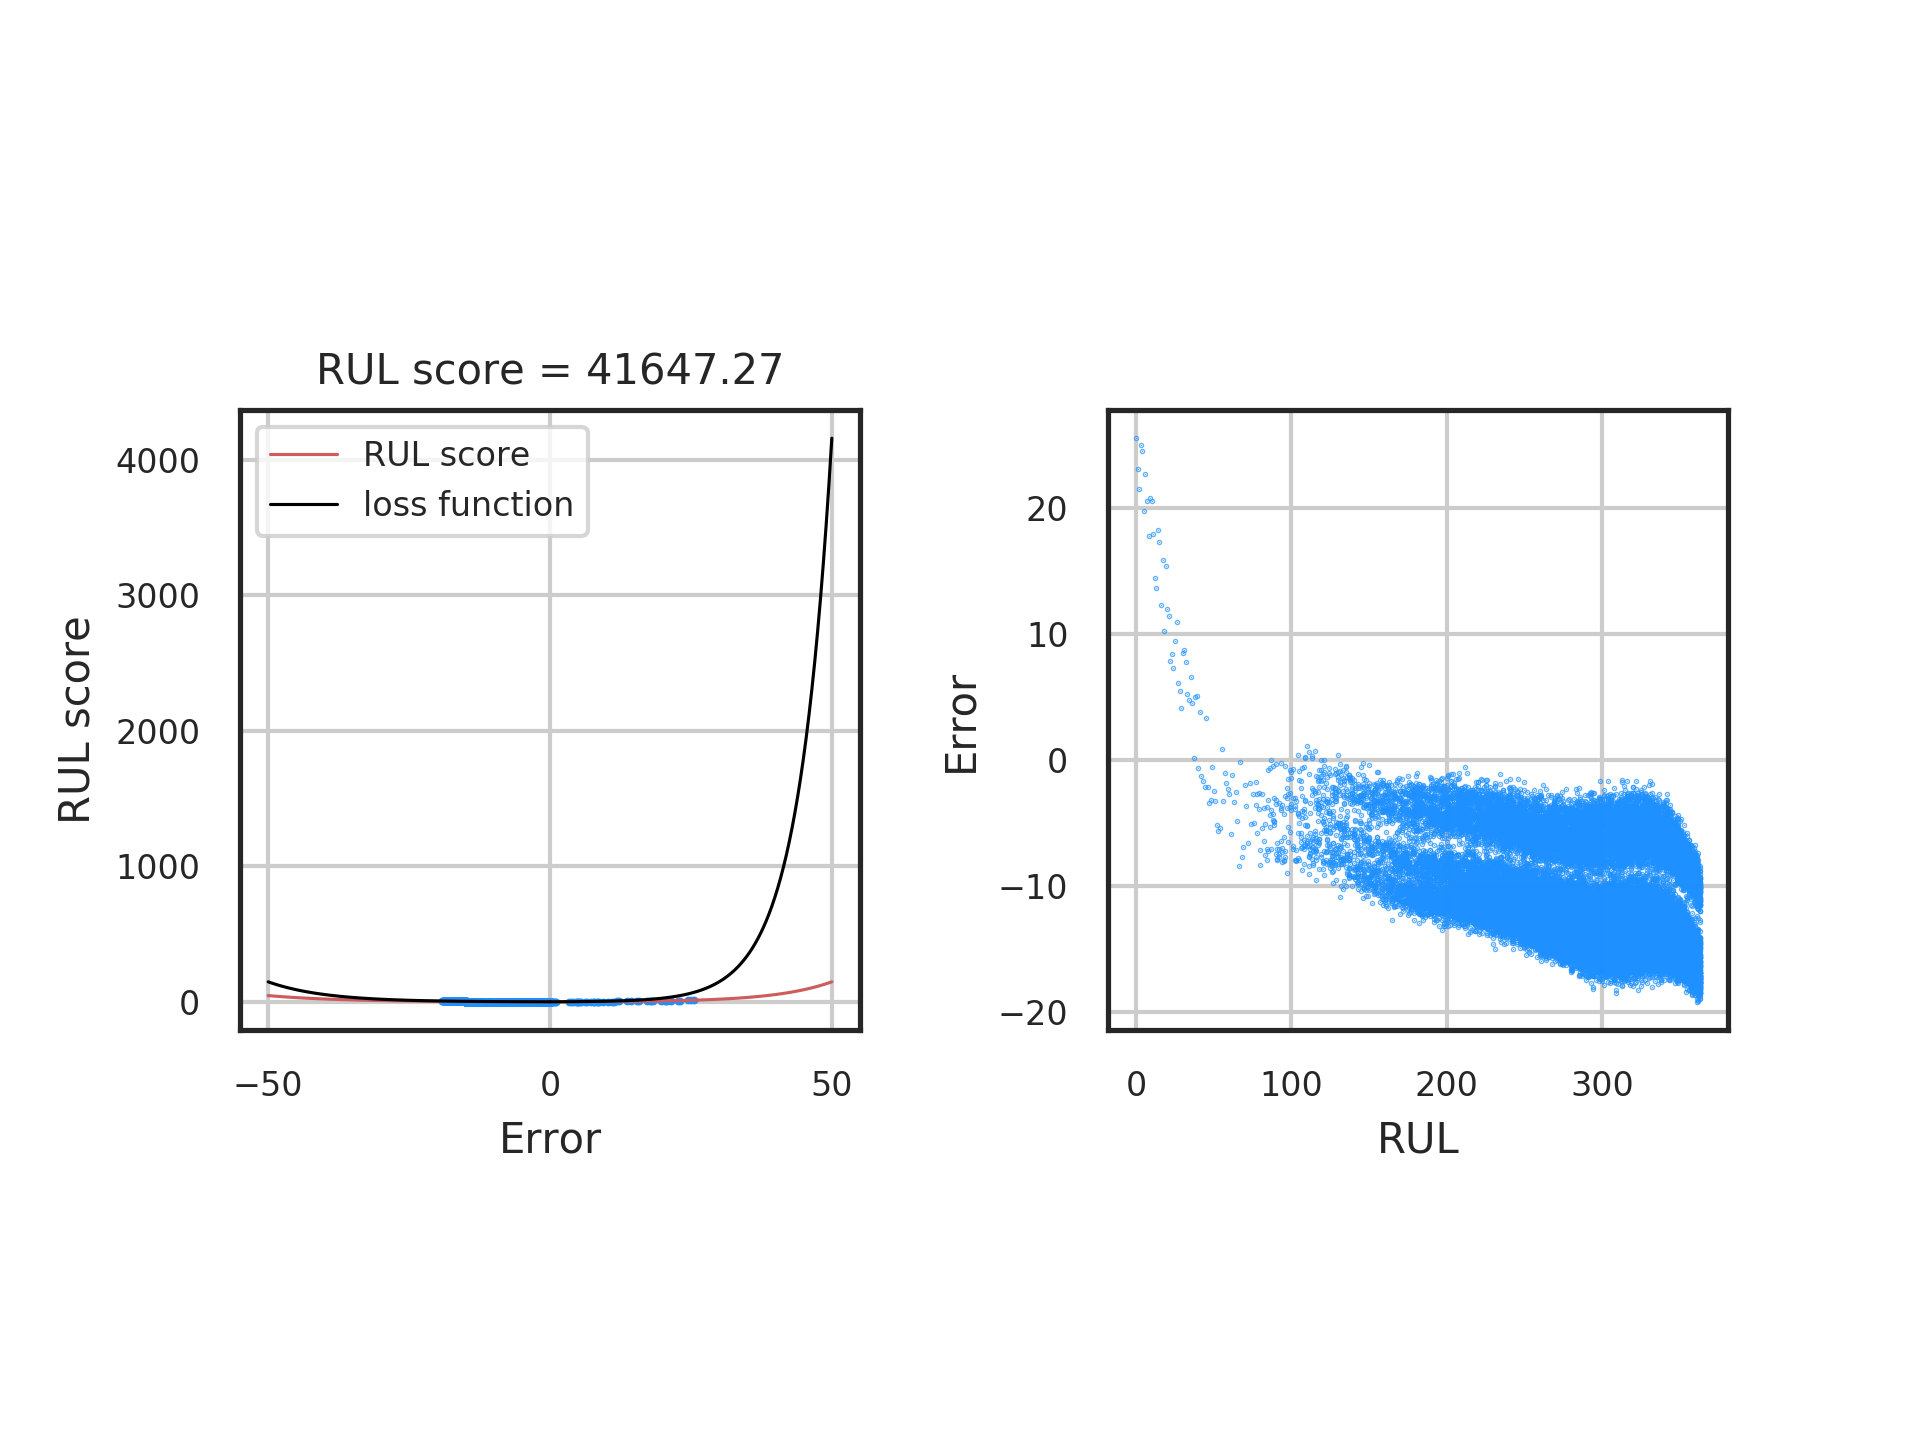

In [69]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'.png') 

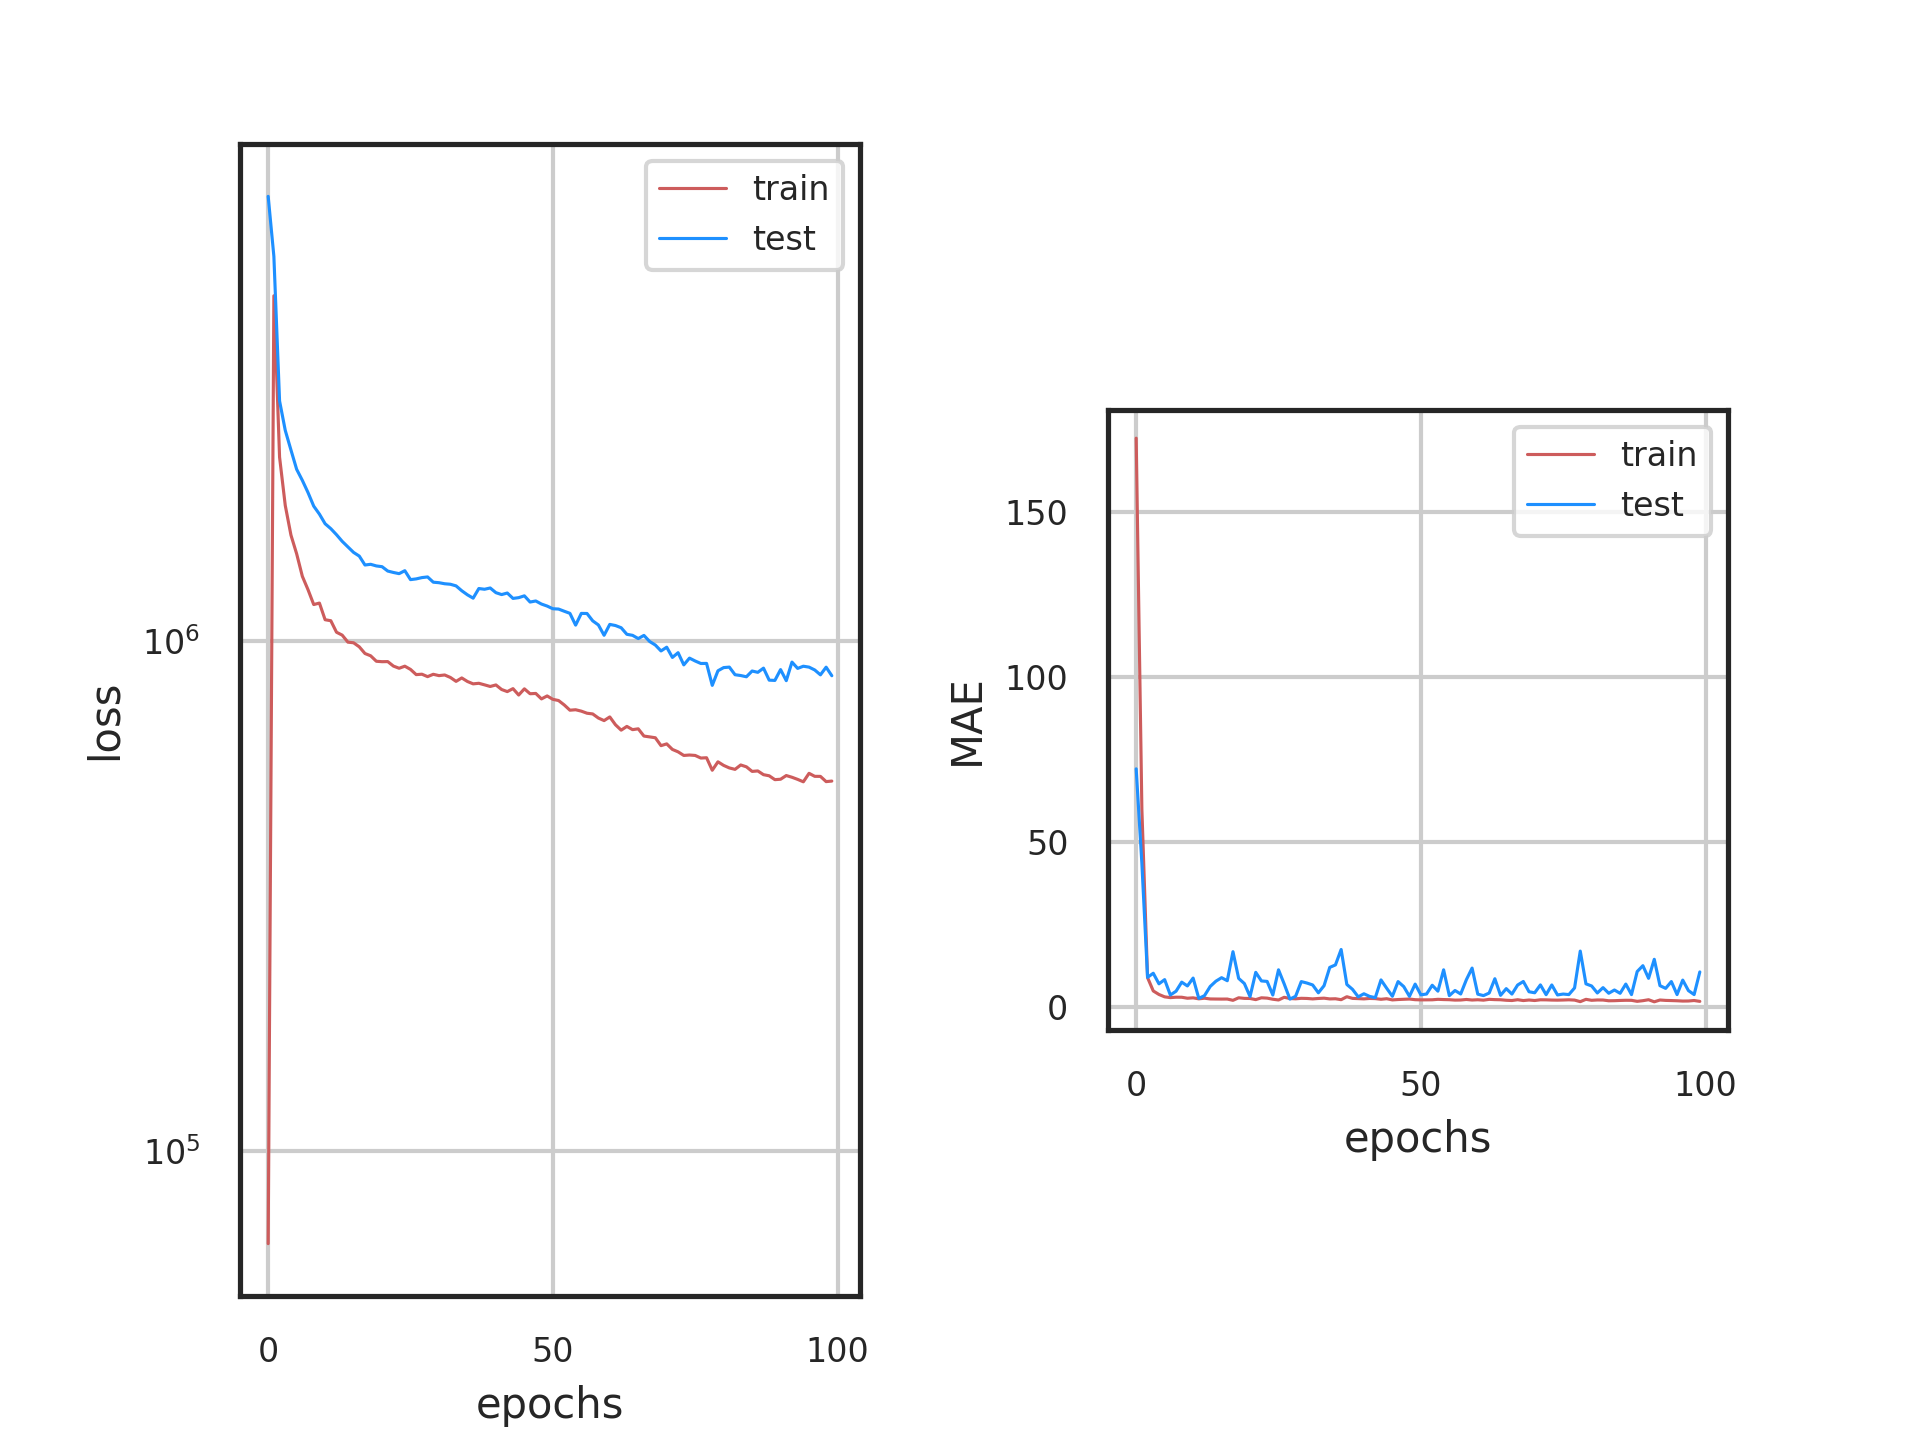

In [70]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'_learning.png')

## Customized RUL loss

A customized loss function can be used to train the DNN for regression. 

In [71]:
name = 'MLP_NASA_Challenge_RUL_loss_a_10_6'
DATA_DIR = '/home/laptop/Documents/data/aviation/NASA/Challenge_Data/'
filename = DATA_DIR+'model/'+name+'_y_test.csv'
df = pd.read_csv(filename)
df.sort_values(by=['y'], ascending=True, inplace=True)
print(df.shape)
df.head(n=5)

(29820, 2)


,y,y_hat
29819,0.0,30.547058
29818,1.0,26.861845
29817,2.0,26.055946
29816,3.0,24.390753
29815,4.0,24.188845


In [72]:
FIG_DIR = "/home/laptop/Documents/data/aviation/NASA/Challenge_Data/figures/"
metric = Metrics()
metric.plot_RUL(df['y'].values, df['y_hat'].values, name=name)
history = DATA_DIR+'model/'+name+'_history.pkl'
print(history)
metric.plot_learning(name=name)
del metric

/home/laptop/Documents/code/DL/dlenv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/home/laptop/Documents/data/aviation/NASA/Challenge_Data/model/MLP_NASA_Challenge_RUL_loss_a_10_6_history.pkl


/home/laptop/Documents/code/DL/dlenv/lib/python3.6/site-packages/matplotlib/axes/_base.py:2575: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()


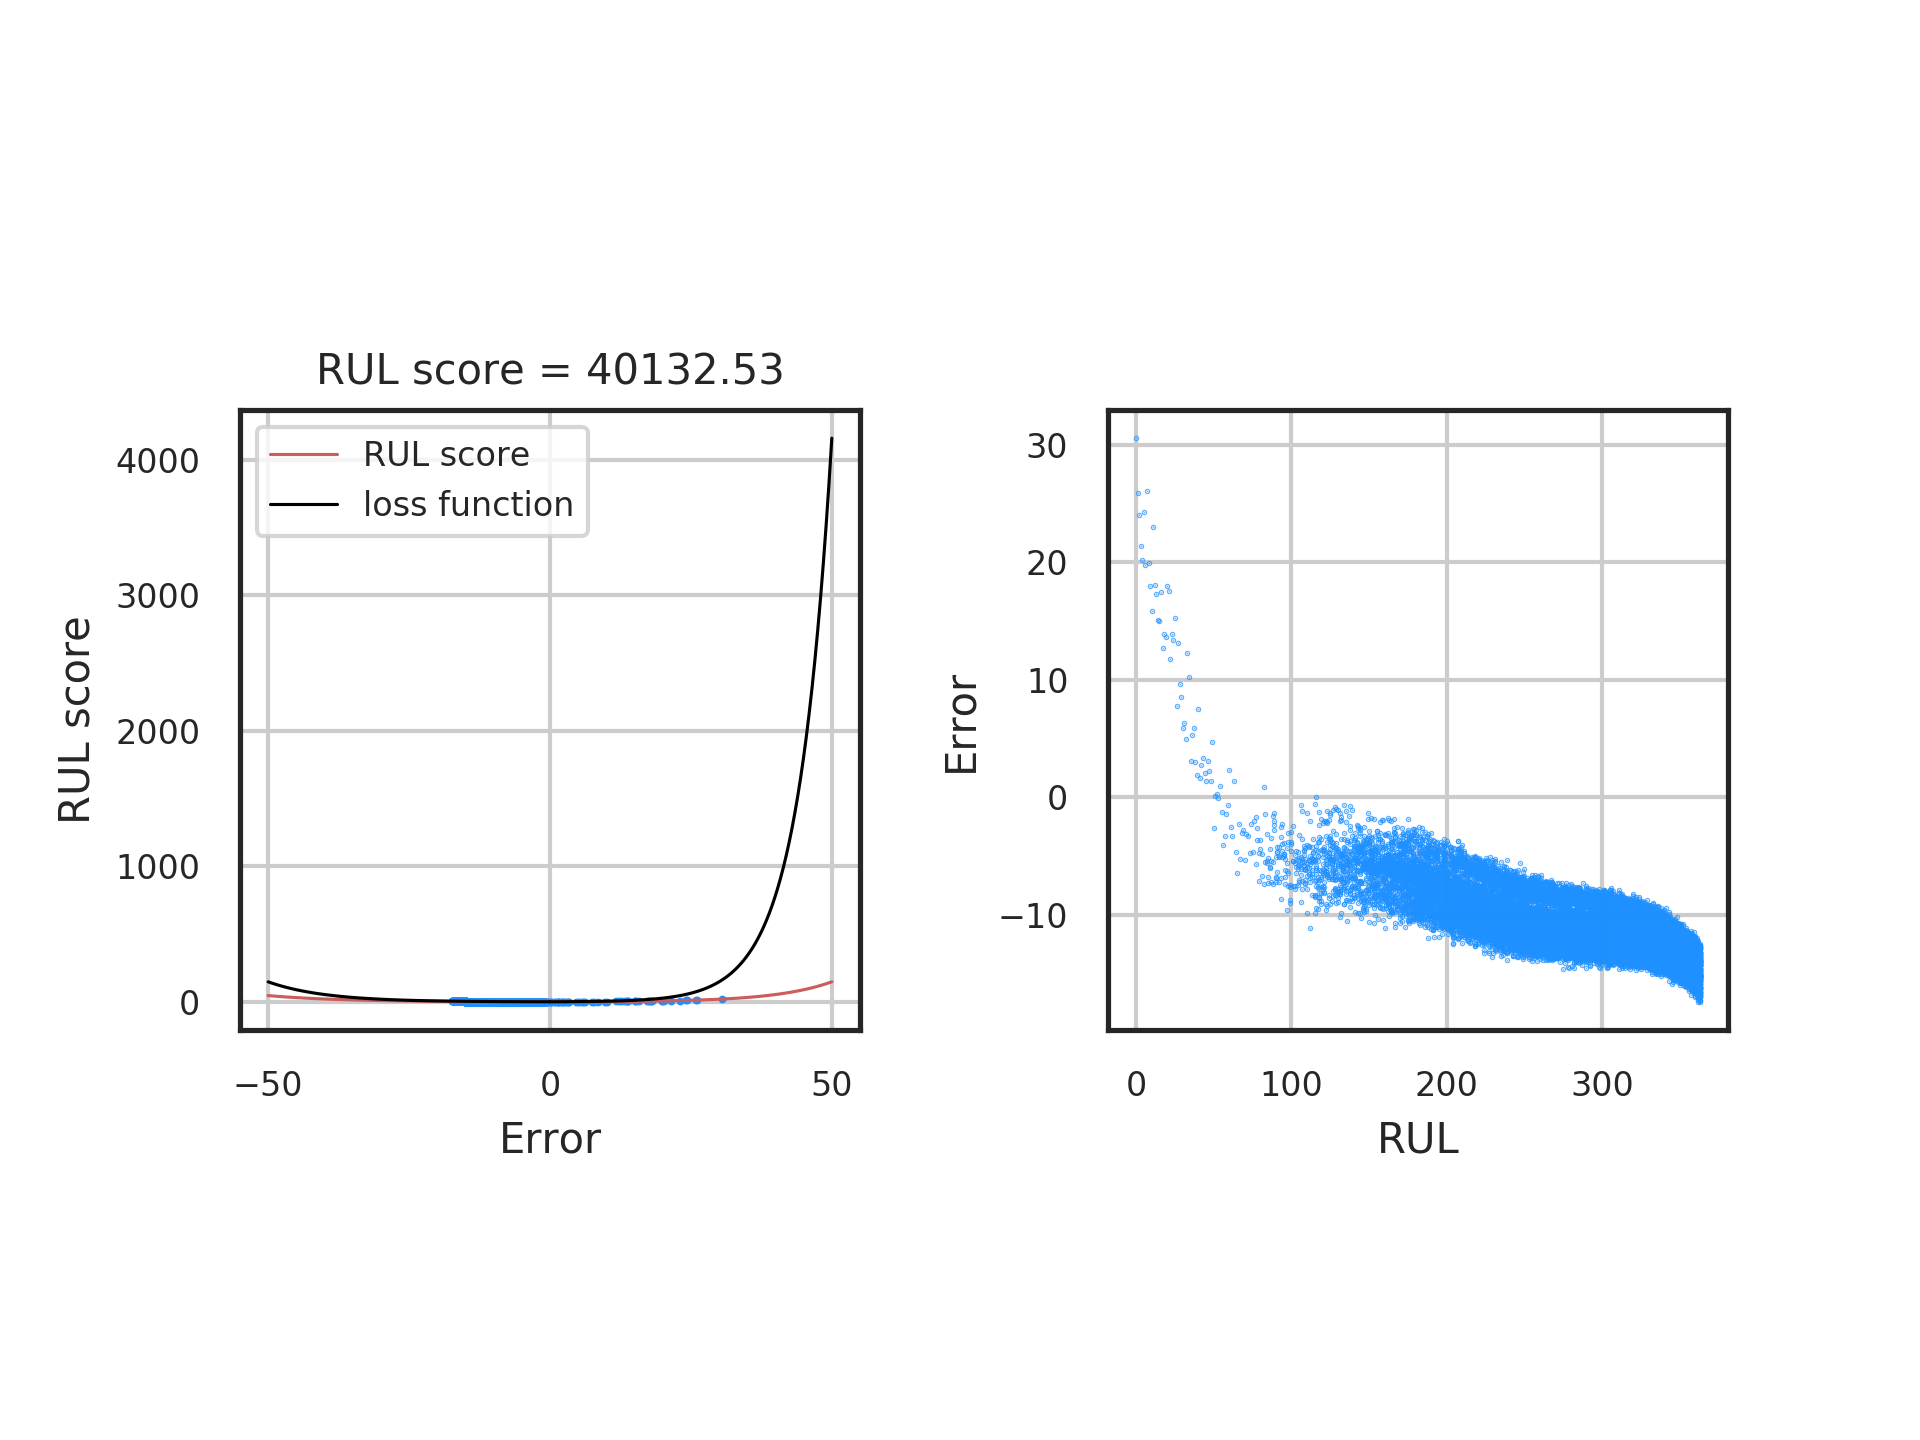

In [73]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'.png')

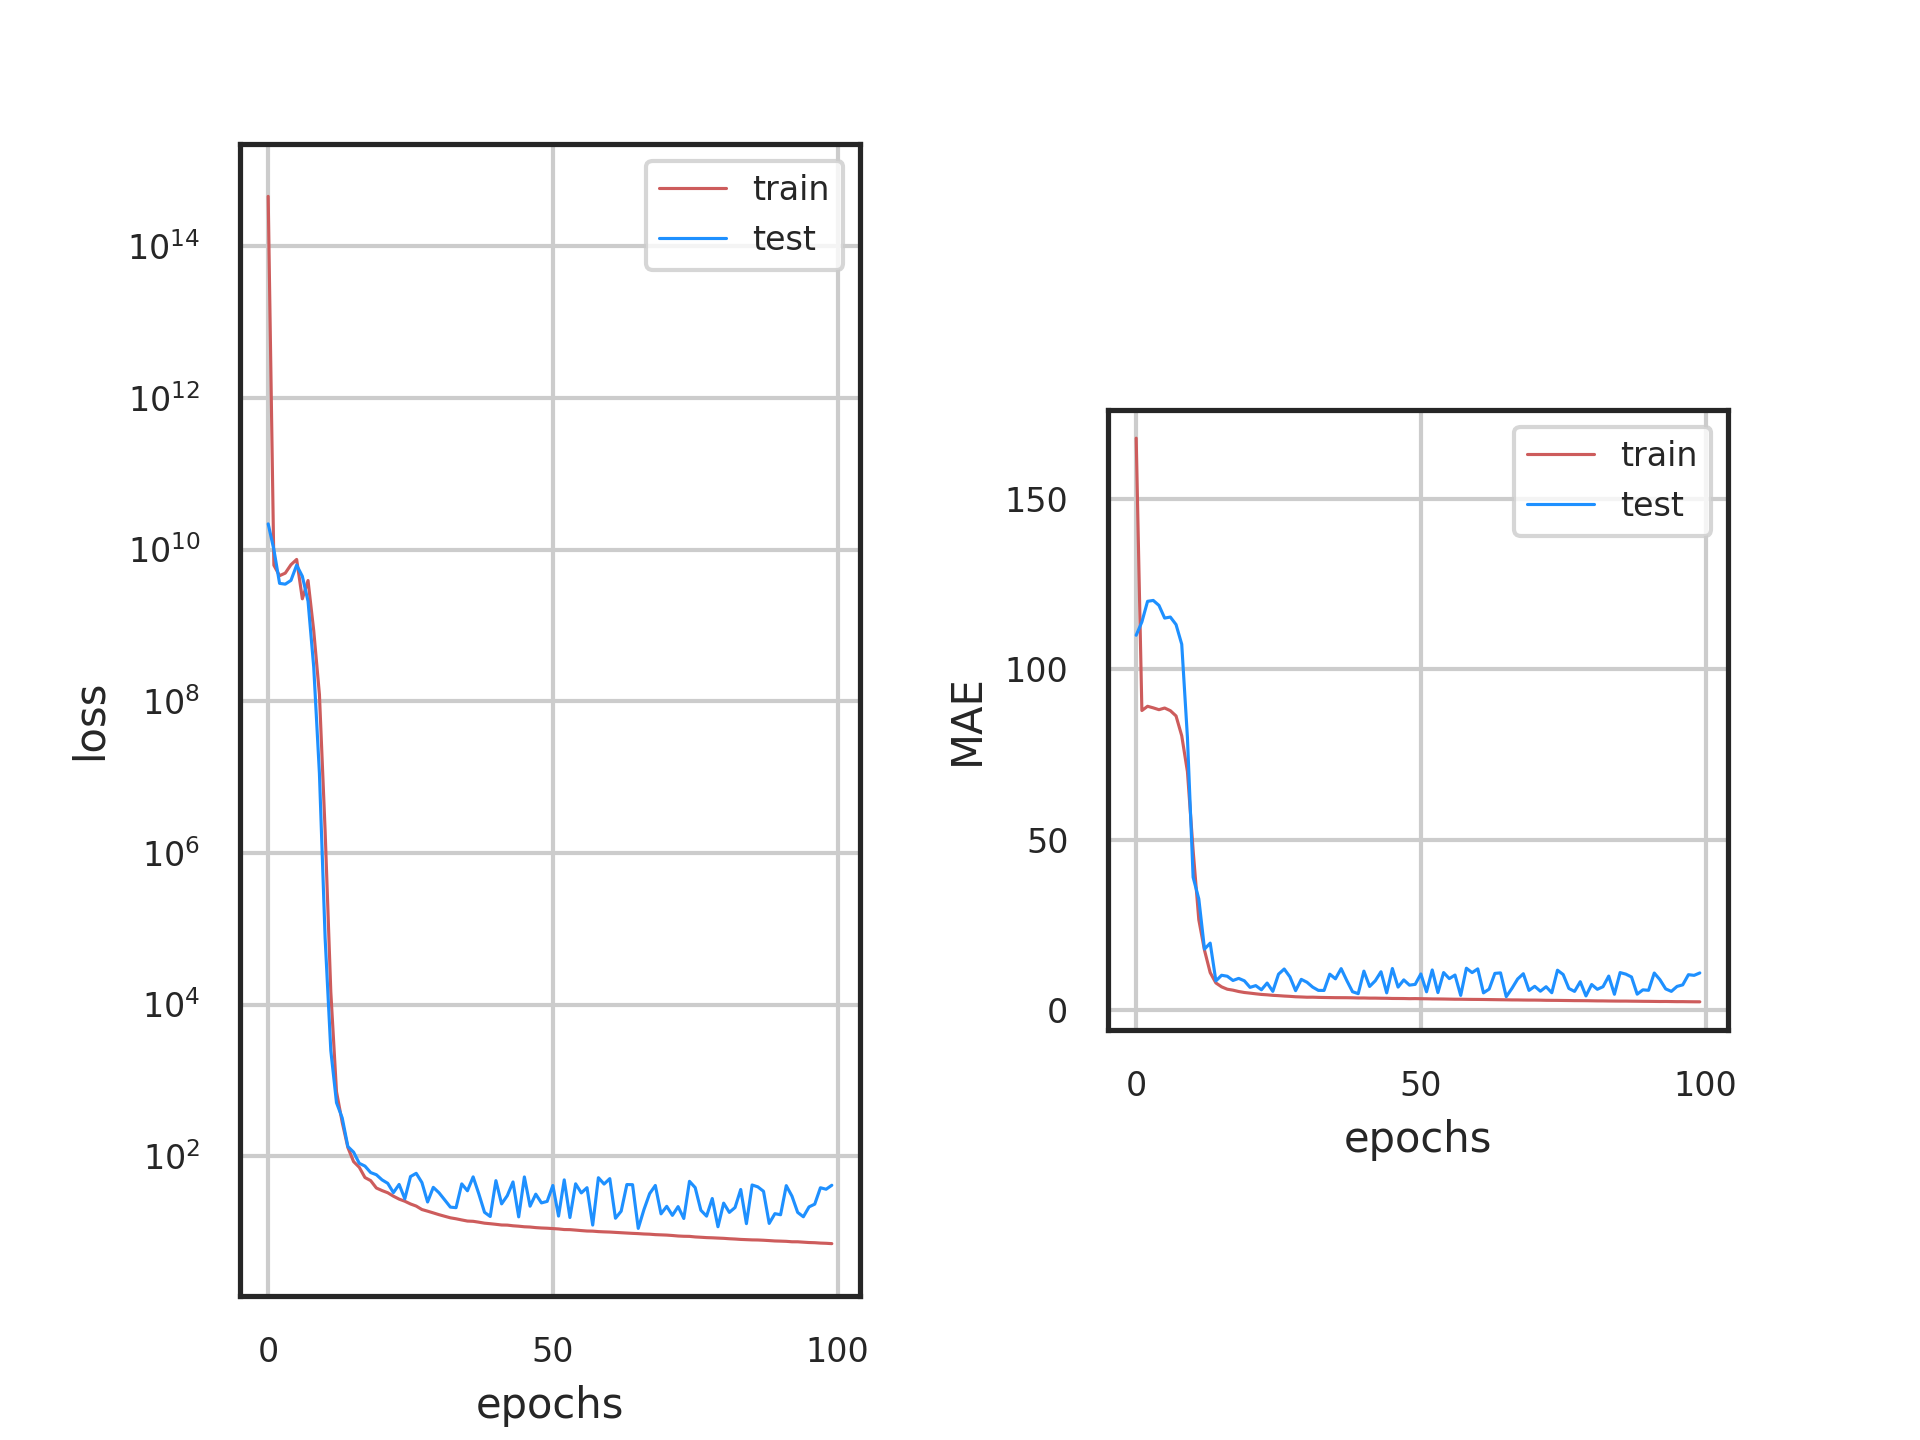

In [74]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'_learning.png')

# Recurrent neural network


## Mean absolute percentage error

In [80]:
name = 'RNN_NASA_Challenge_RUL'
DATA_DIR = '/home/laptop/Documents/data/aviation/NASA/Challenge_Data/'
filename = DATA_DIR+'model/'+name+'_y_test.csv'
df = pd.read_csv(filename)
df.sort_values(by=['y'], ascending=True, inplace=True)
print(df.shape)
df.head(n=5)

(29746, 2)


,y,y_hat
29745,74.0,43.292015
29744,75.0,42.203674
29743,76.0,43.969128
29742,77.0,43.880653
29741,77.0,42.973230


In [82]:
FIG_DIR = "/home/laptop/Documents/data/aviation/NASA/Challenge_Data/figures/"
metric = Metrics()
metric.plot_RUL(df['y'].values, df['y_hat'].values, name=name)
#history = DATA_DIR+'model/'+name+'_history.pkl'
#print(history)
#metric.plot_learning(name=name)
del metric

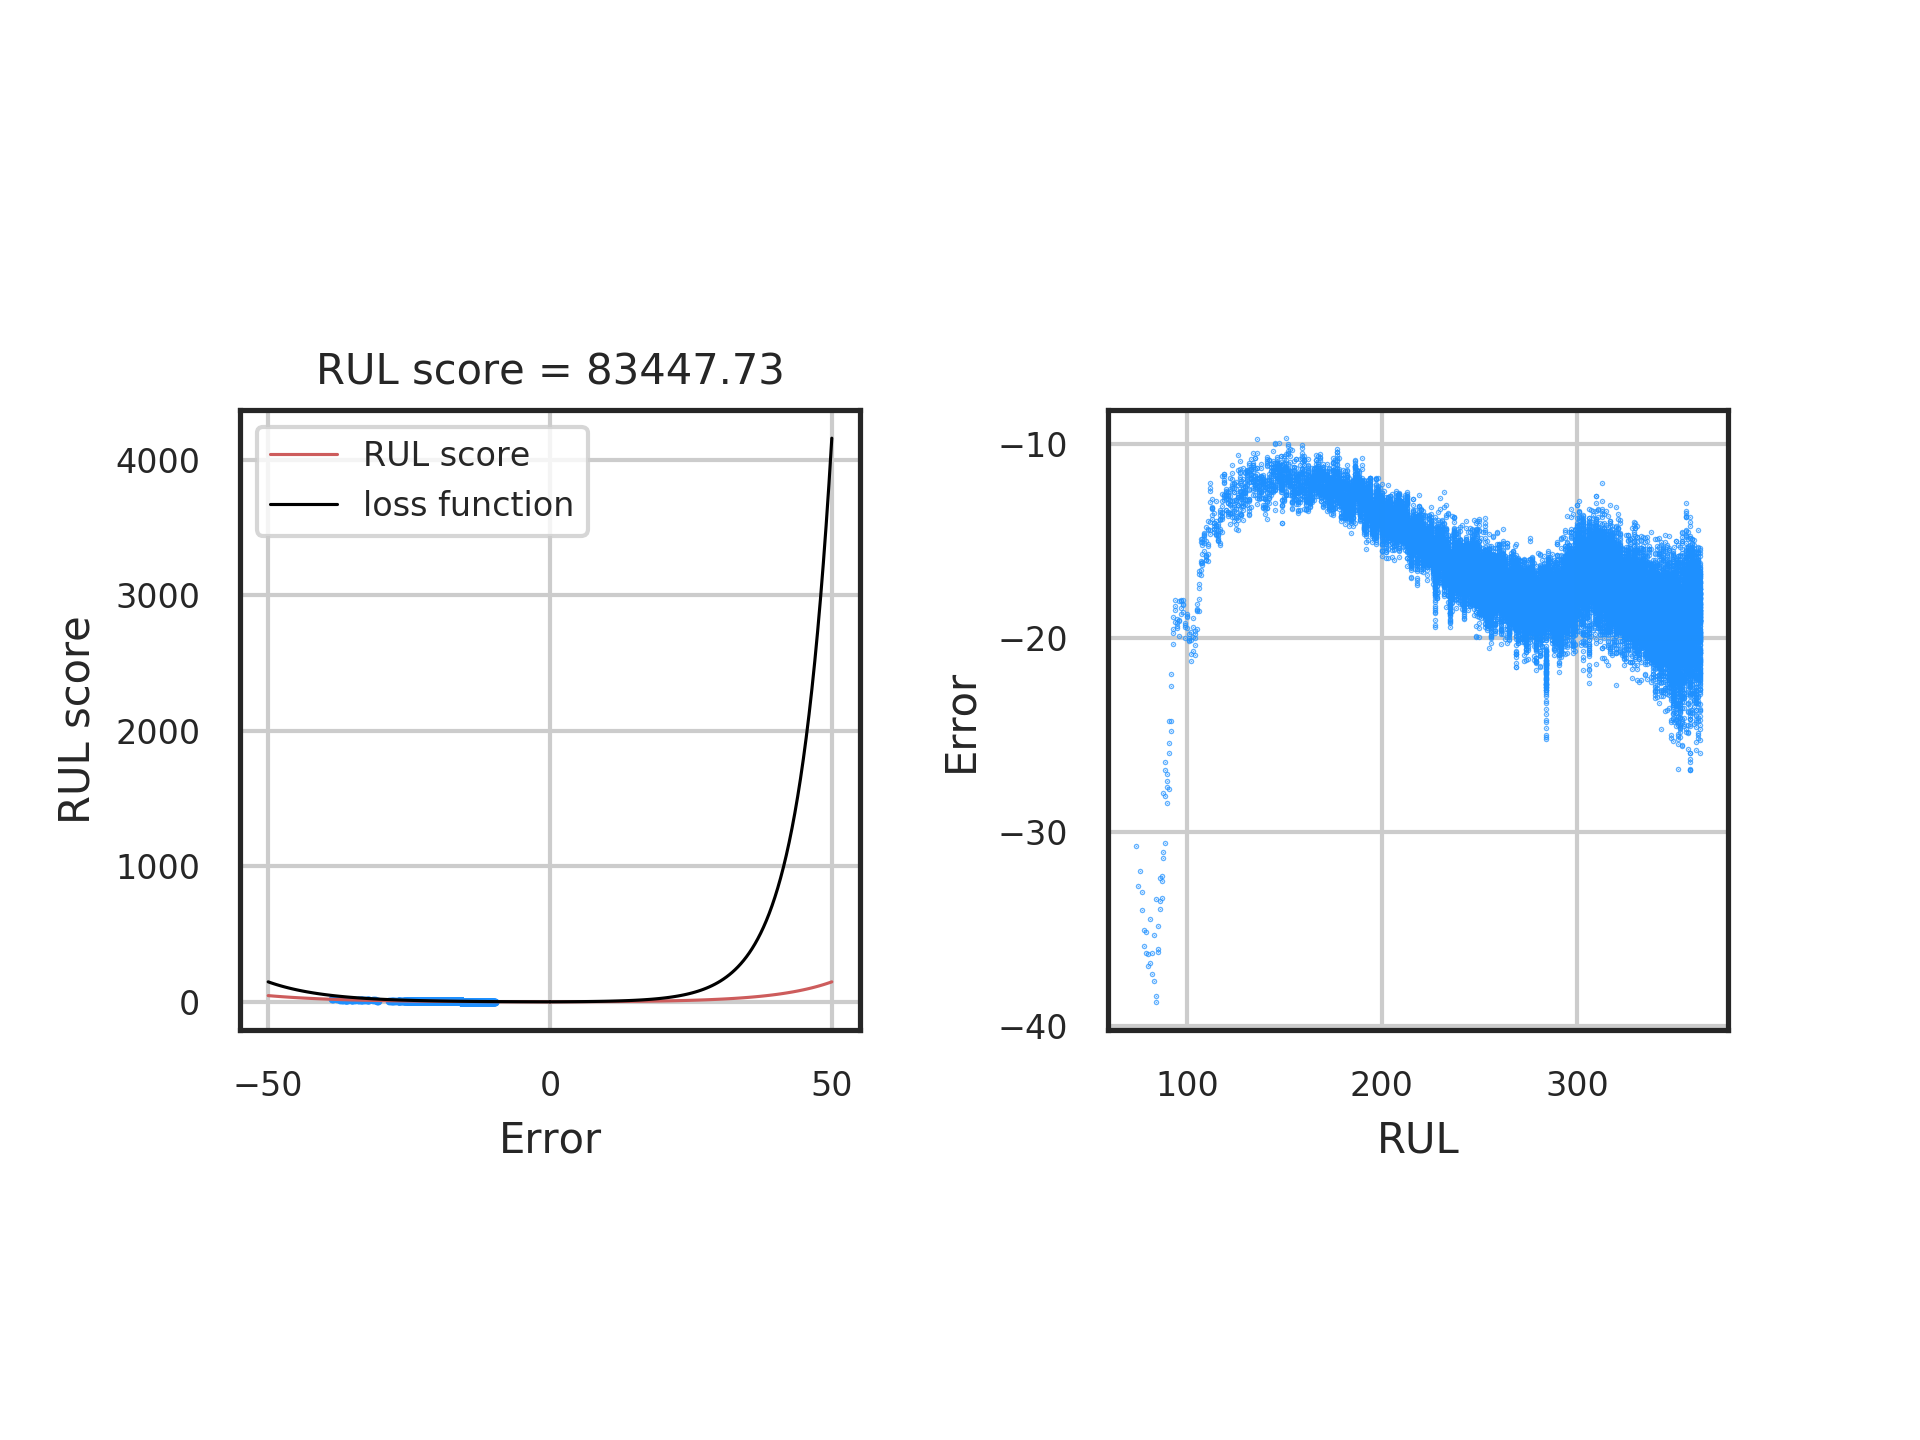

In [83]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'.png')

In [84]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'_learning.png')

FileNotFoundError: [Errno 2] No such file or directory: '/home/laptop/Documents/data/aviation/NASA/Challenge_Data/figures/RNN_NASA_Challenge_RUL_learning.png'

## Customized RUL loss

In [76]:
name = 'RNN_NASA_Challenge_RUL_loss_a_10_6_exp'
DATA_DIR = '/home/laptop/Documents/data/aviation/NASA/Challenge_Data/'
filename = DATA_DIR+'model/'+name+'_y_test.csv'
df = pd.read_csv(filename)
df.sort_values(by=['y'], ascending=True, inplace=True)
print(df.shape)
df.head(n=5)

(29746, 2)


,y,y_hat
29745,74.0,57.142490
29744,75.0,58.749540
29743,76.0,57.418710
29742,77.0,58.117058
29741,77.0,58.050266


In [77]:
FIG_DIR = "/home/laptop/Documents/data/aviation/NASA/Challenge_Data/figures/"
metric = Metrics()
metric.plot_RUL(df['y'].values, df['y_hat'].values, name=name)
history = DATA_DIR+'model/'+name+'_history.pkl'
print(history)
metric.plot_learning(name=name)
del metric

/home/laptop/Documents/code/DL/dlenv/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/home/laptop/Documents/data/aviation/NASA/Challenge_Data/model/RNN_NASA_Challenge_RUL_loss_a_10_6_exp_history.pkl


/home/laptop/Documents/code/DL/dlenv/lib/python3.6/site-packages/matplotlib/axes/_base.py:2575: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  self.apply_aspect()


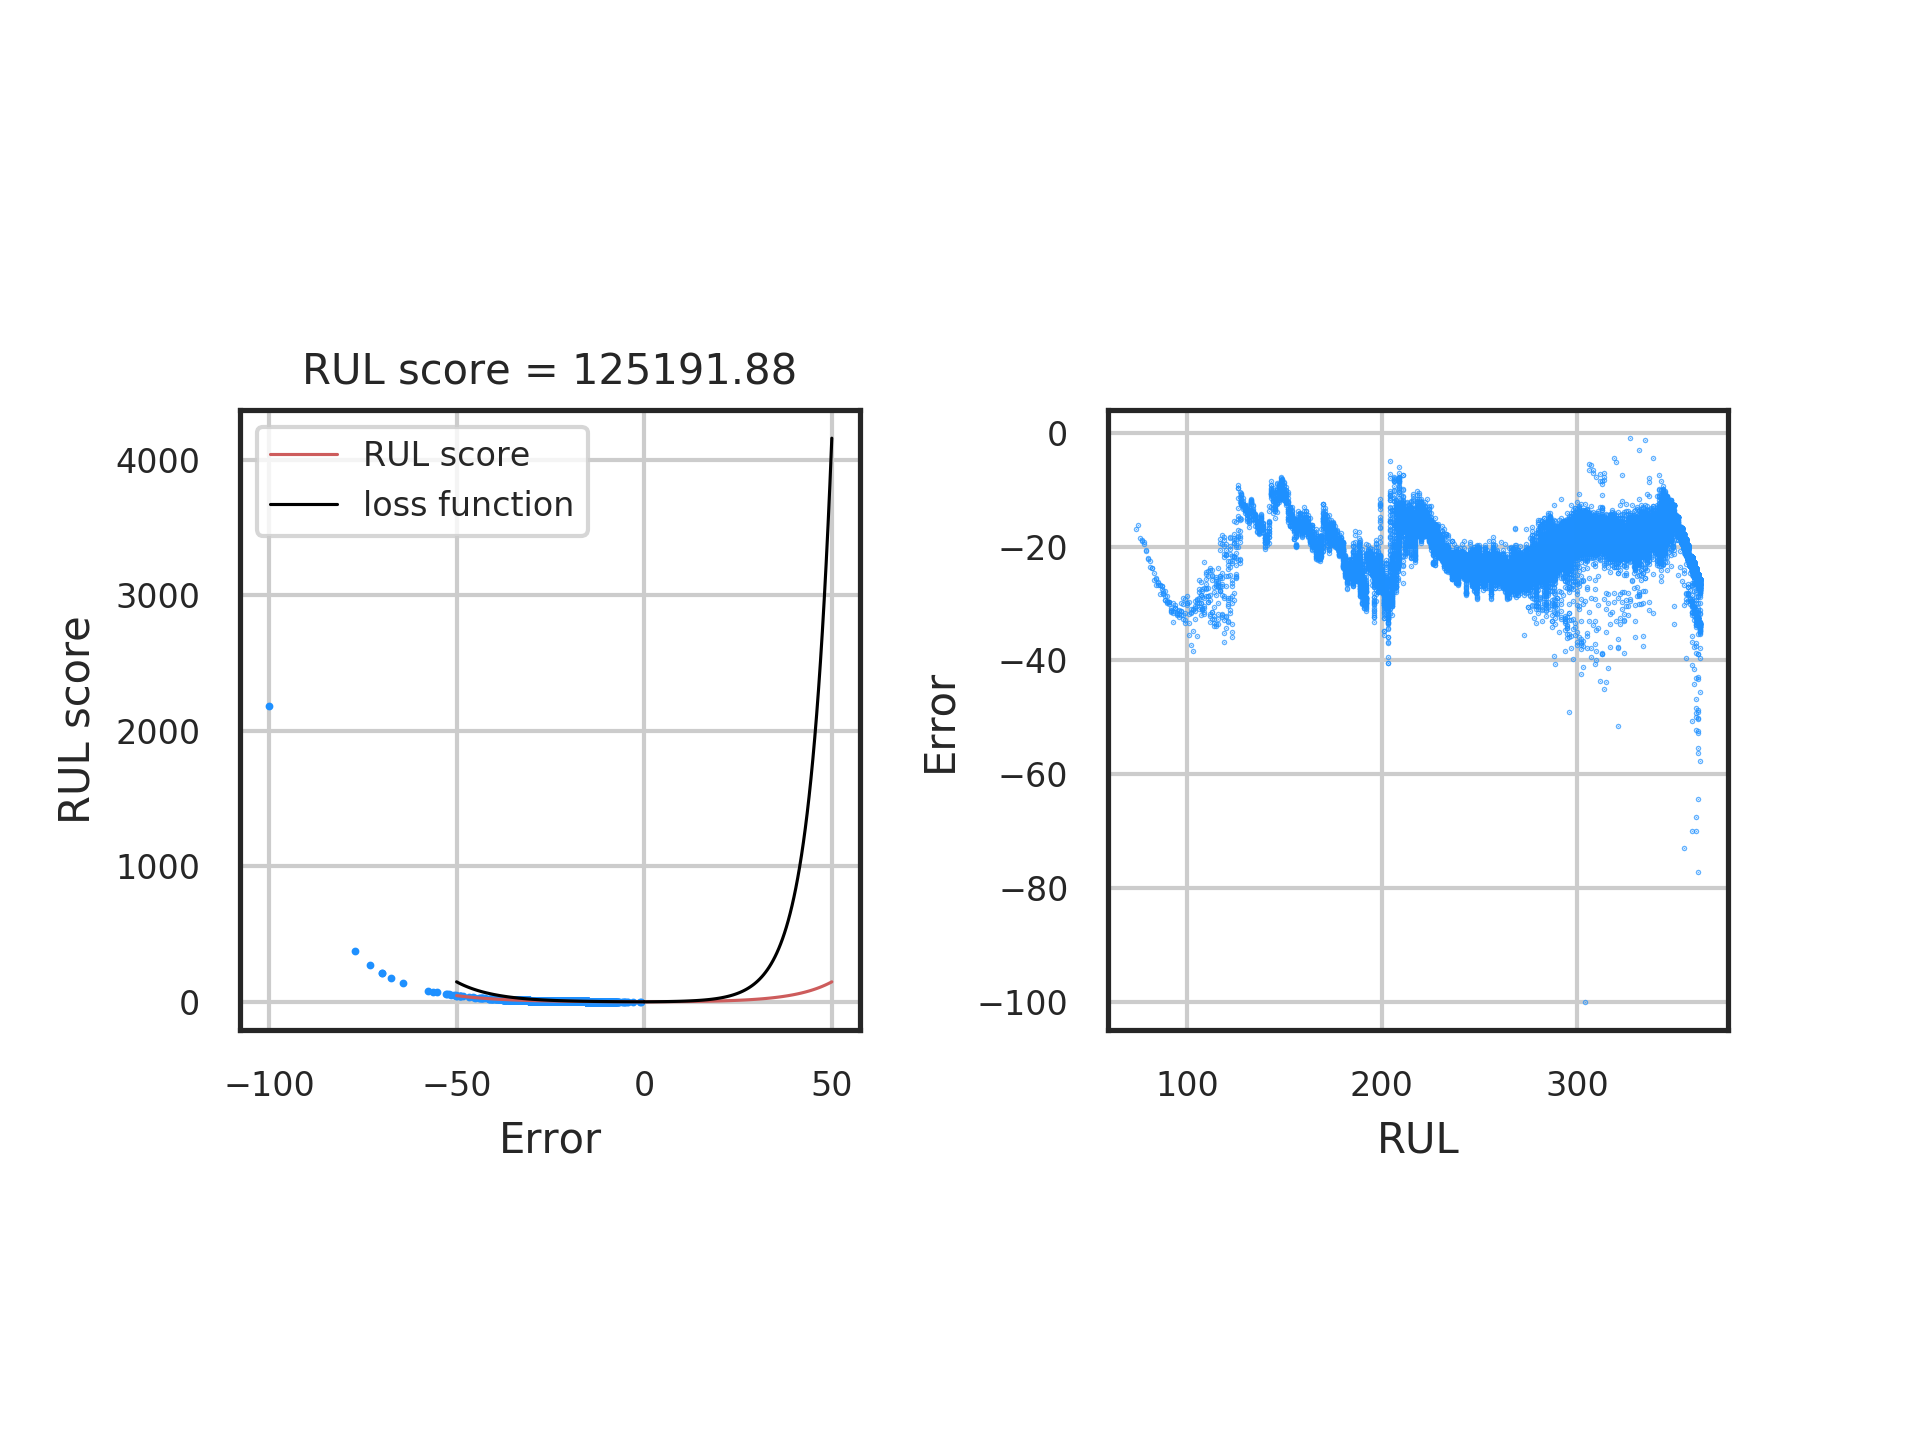

In [78]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'.png')

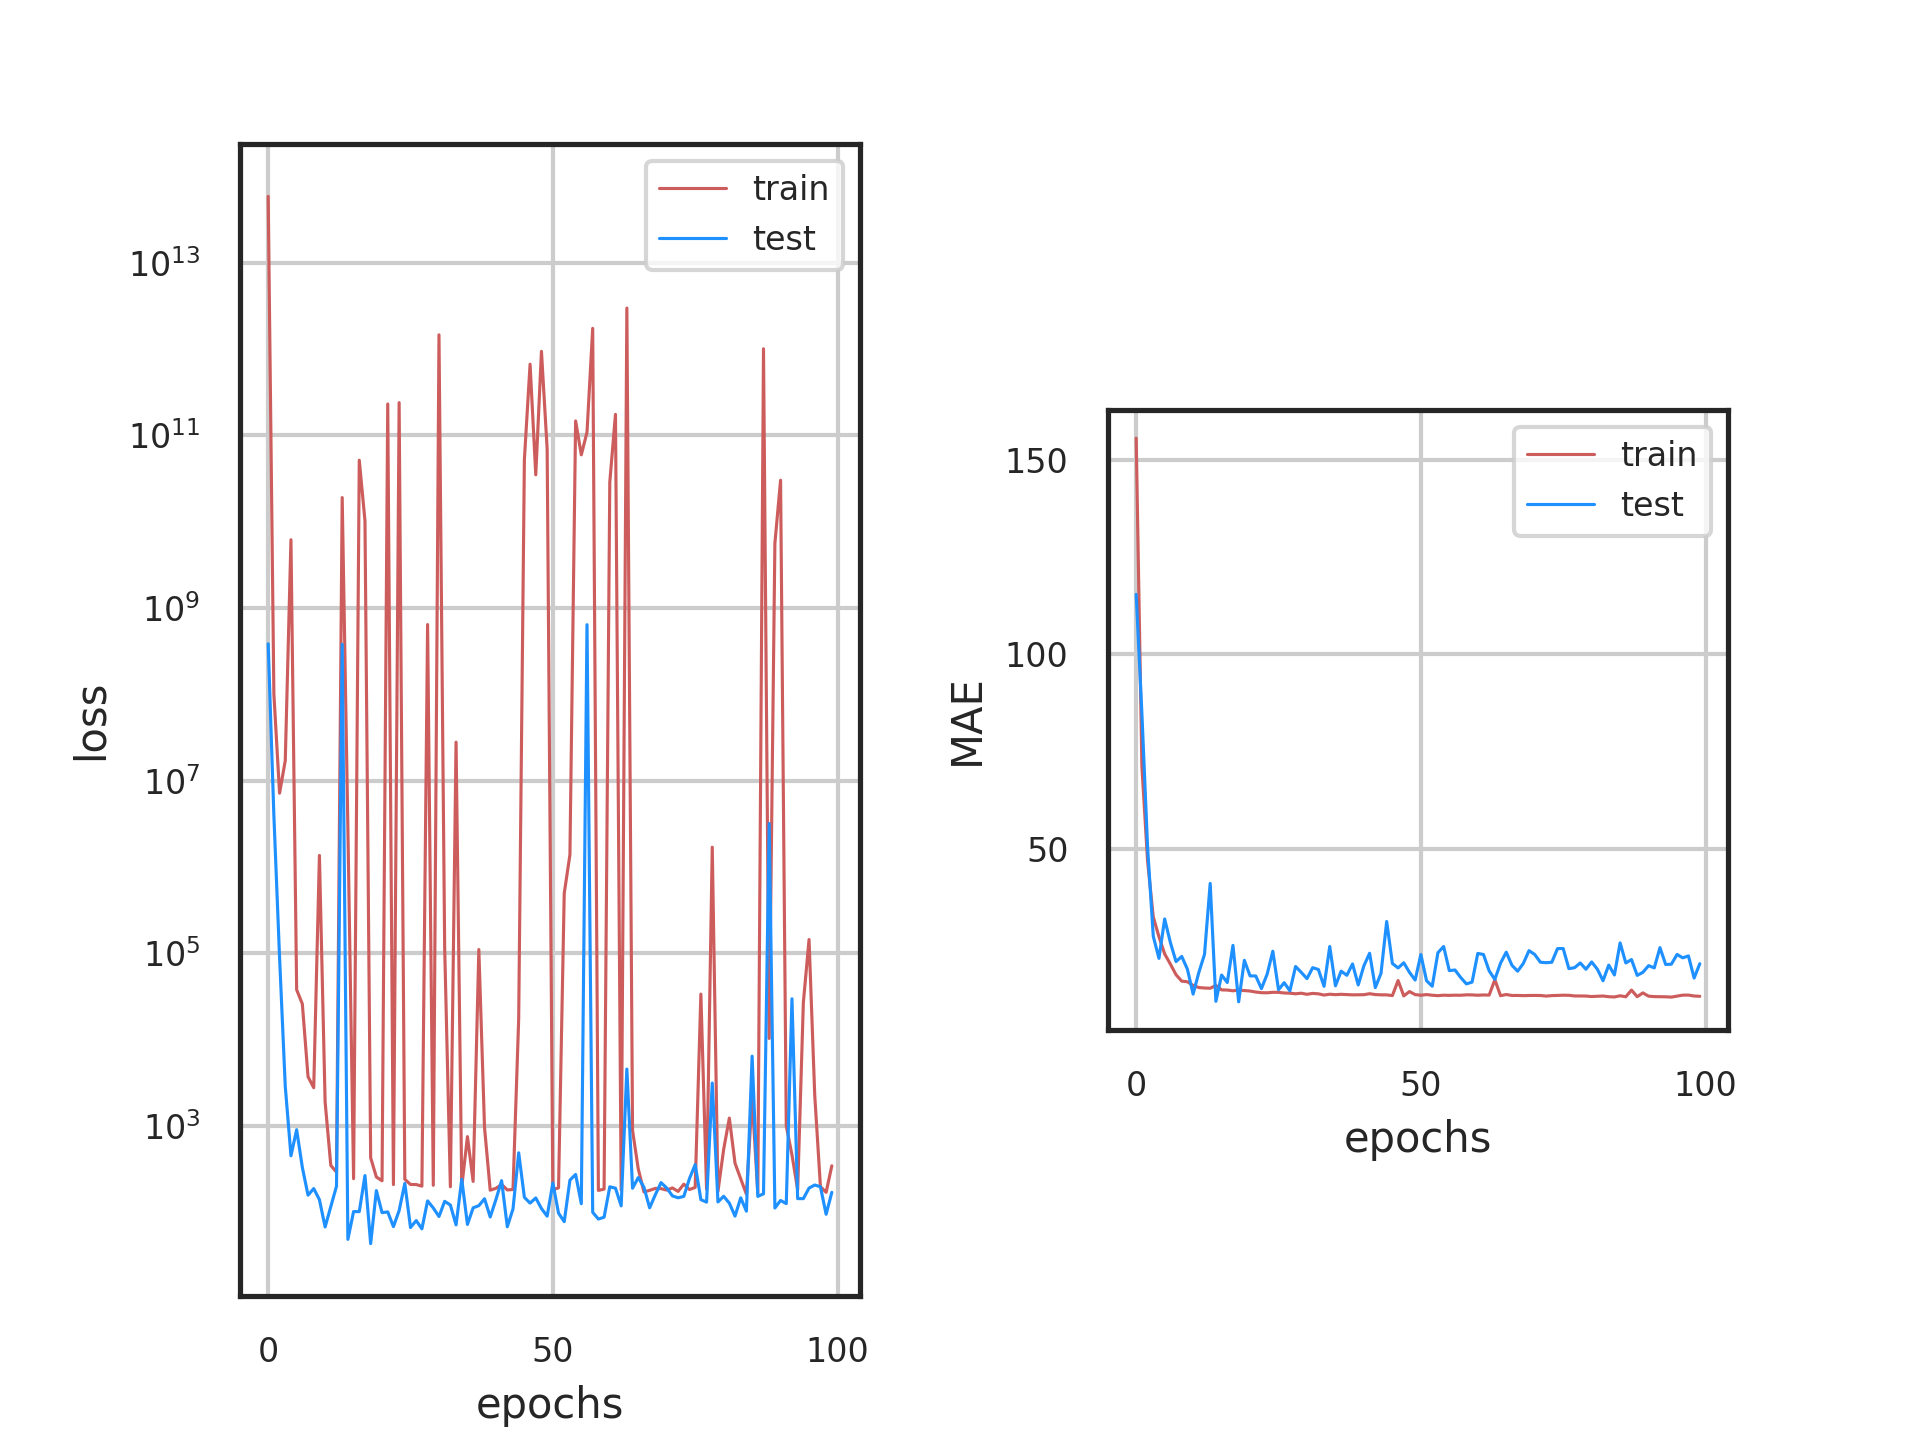

In [79]:
from IPython.display import Image
Image(filename=FIG_DIR+name+'_learning.png')